Performance Transformer Optimism Bias Task

In [10]:
import sys
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

import seaborn as sns


base_path = '/u/jschubert/learning_bias/meta-rl/optimism/data/exp/Transformer__150000__mode_train__num_layers_2__linear_size_192/'

In [12]:
train_data = pd.read_csv(base_path+'train_df.csv')
test_data = pd.read_csv(base_path+'test_exp.csv')
sim = pd.read_csv(base_path+'simulation_all_part.csv')

# csv_files = glob.glob(base_path + f'exp/' + "*.csv")
# exp = (pd.read_csv(file) for file in csv_files)
# exp = pd.concat(exp, ignore_index=True)
# exp = exp.sort_values('test_part_idx')
# exp.to_csv(base_path + 'test_exp.csv', index=False)

Test

/tmp/ipykernel_111524/1414768968.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df, x='uo_idx', y='uo_regrets', ax=ax1, color='#332288', ci=95)


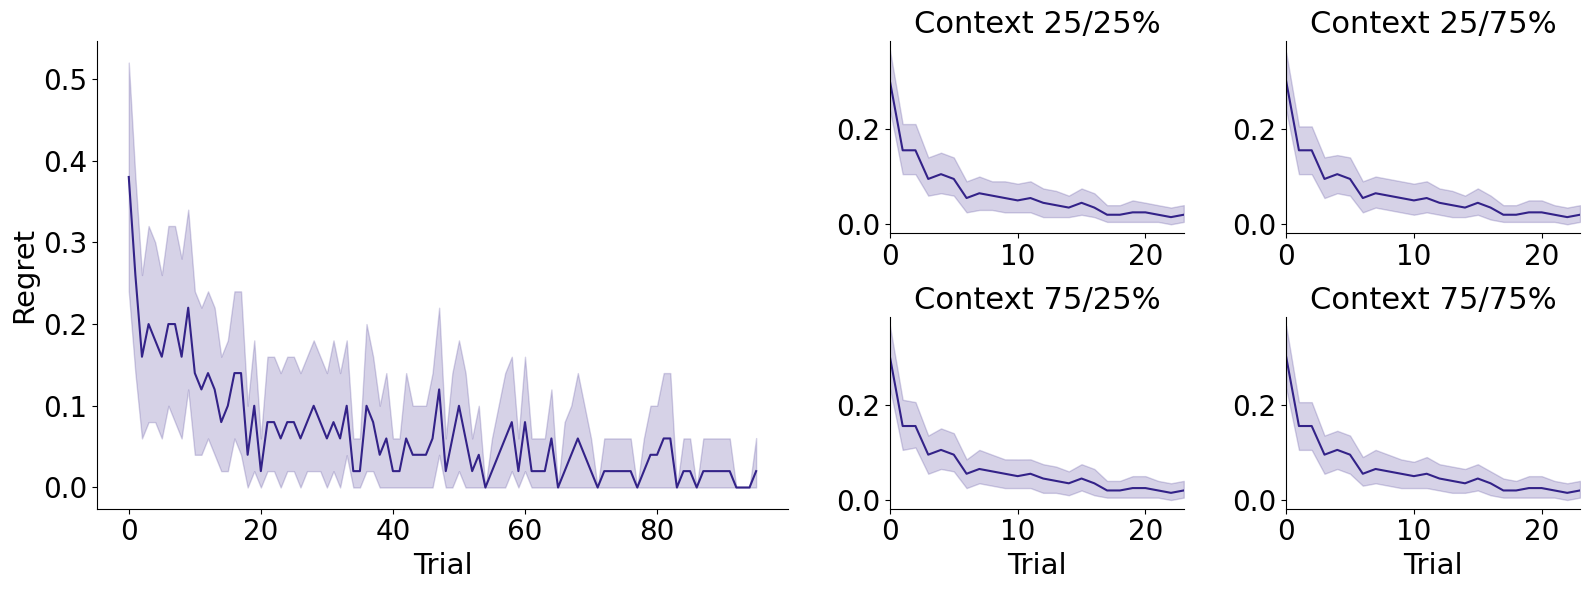

In [13]:
fig = plt.figure(figsize=(16,6), dpi=100)

# Setting up grid and positions for subplots
grid = gs.GridSpec(2, 4, figure=fig)
ax1 = fig.add_subplot(grid[0:2, 0:2])

# Plots on the right half
ax2 = fig.add_subplot(grid[0, 2])
ax3 = fig.add_subplot(grid[0, 3], sharey=ax2)
ax4 = fig.add_subplot(grid[1, 2], sharey=ax2)
ax5 = fig.add_subplot(grid[1, 3], sharey=ax2)

axs = [ax2, ax3, ax4, ax5]
title = ['Context 25/25%', 'Context 25/75%', 'Context 75/25%', 'Context 75/75%']

# Main plot
df = test_data
sns.lineplot(data=df, x='uo_idx', y='uo_regrets', ax=ax1, color='#332288', ci=95)
ax1.tick_params(labelsize=20)
#ax1.set_title('Test set performance', fontsize=18)
ax1.set_xlabel('Trial', fontsize=21)
ax1.set_ylabel('Regret', fontsize=21)

# Smaller plots
for i, ax in enumerate(axs):
    ax.grid(False)
    sns.lineplot(data=df.reset_index(), x='trials_idx', y='regrets', ax=ax, color='#332288')  
    sns.despine()
    ax.set_title(title[i], fontsize=22)
    ax.tick_params(labelsize=20)
    if i == 1 or i == 0:
        ax.set_xlabel('', fontsize=21)
    else:
        ax.set_xlabel('Trial', fontsize=21)
    ax.set_ylabel(' ', fontsize=21)
    ax.set_xlim(0,23)


plt.tight_layout()
plt.show()

Train

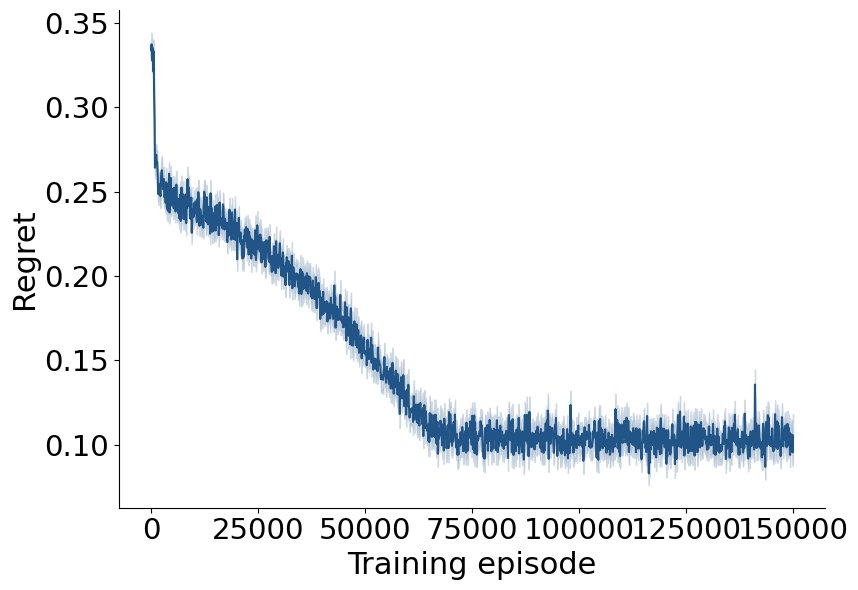

In [16]:
fig, ax = plt.subplots(1, figsize=(8.7,6), dpi=100)
df = train_data
sns.lineplot(data=df, x='plot_idx', y='uo_regrets', ax=ax, color='#215487', errorbar=('ci',95))
sns.despine()
#ax.set_title('Train set performance', fontsize=18)
ax.tick_params(labelsize=21)
ax.set_xlabel('Training episode', fontsize=22)
ax.set_ylabel('Regret', fontsize=22)
plt.tight_layout()
plt.show()